In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import statistics
import pywt
from tabulate import tabulate

In [ ]:
df = pd.read_csv('Data/2_f_1.csv', header=None, names = ['RR'])

# проведем интерполяцию
RR = df.RR

signal = np.array(RR)
time_x = [0]
for i in range(0,len(signal)-1):
    time_x.append(signal[i]/1000+time_x[i])

from scipy.interpolate import CubicSpline
cs = CubicSpline(time_x, signal)
xs = np.arange(0, max(time_x), 0.1)

max_time = int(max(time_x))
delta = 0.25
scale = 1/delta
n_batch = int(max_time*scale/2)
time = np.array([float(i)*delta for i in range(int(n_batch*2))])
values = cs(time)
values

array([958.        , 959.81080439, 964.29549188, ..., 876.39720105,
       890.98439867, 911.99730844])

In [ ]:
values.shape

(1160,)

По массиву кардиоинтервалов провести анализ сигнала с использованием
вейвлет-преобразования:
1. выполнить вейвлет-преобразование сигнала, сохраните матрицу вейвлет-преобразования;
2. визуализировать матрицу вейвлет-преобразования биосигнала;
3. выполнить обратное вейвлет-преобразование сигнала;
4. визуализировать компоненты обратного вейвлет-преобразования биосигнала;
5. сохранить изображение компонент обратного вейвлет-преобразования биосигнала;
6. произвести расчет параметров вейвлет-преобразования биосигнала;
7. сравнить результаты при использовании различных базисных функций;
8. подготовить отчет по полученным результа

In [ ]:
# Функция возвращает матрицу прямого вейвлет-
# преобразования (cwt), матрицу обратного вейвлет-
# преобразования (icwt) и соответствующий вектор частот
# Аргументы: интерполированный сигнал, название базисной вейвлет-
# функции (w), нижняя и верхняя граница частотного диапазона (f1, f2) и частота
# дискретизации D
def get_wavelets(signal, w, f1, f2, D):
  fc = pywt.central_frequency(w)
  a1 = fc/(D*f1)
  a2 = fc/(D*f2)
  lna1 = np.log(a1)
  lna2 = np.log(a2)
  ln_a = np.linspace(lna1, lna2, 100)
  A = np.exp(ln_a)
  F = fc/(D*A)
  dA = np.zeros(A.shape)
  dA = np.diff(A)
  dA = dA.tolist()
  dA.append(dA[-1])
  cwt, frq = pywt.cwt(signal - np.mean(signal), A, w)
  icwt = np.transpose(np.multiply(np.transpose(cwt),
  dA/pow(A,1.5)))
  return cwt, icwt, F


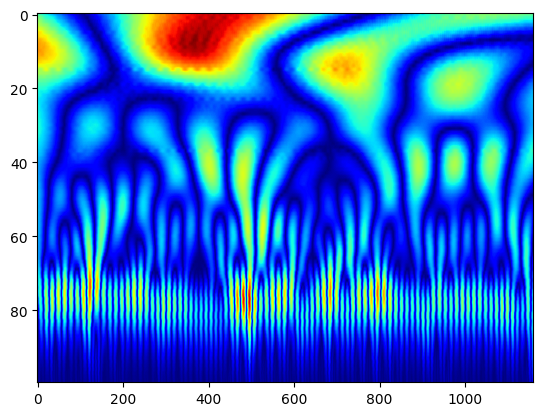

In [ ]:
c_wavelets = ['gaus1','gaus5','gaus8','morl', 'mexh', 'cmor', 'shan']

In [ ]:
def get_all_c_wavelets(values, wavelets, f1, f2, D):
  table = []
  n = len(wavelets)
  i = 0
  fig, axs = plt.subplots(nrows=n, ncols= 1, figsize=(15, 15))
  fig.suptitle(wavelets)
  for wave in wavelets:
    cwt, icwt, F = get_wavelets(values, wave, f1, f2, D)

    axs[i].imshow(np.abs(cwt), cmap='jet', aspect='auto')
    i += 1

    icwt = np.abs(icwt)
    #f = (0.4, 0.15, 0.04, 0.003)
    f = (0.015, 0.04, 0.15, 0.4)
    fnum1=int(0)
    #fnum2=np.argwhere(F>f[1])[-1][0]
    #fnum3=np.argwhere(F>f[2])[-1][0]
    fnum2 = np.argwhere(F > f[1])[0][0]
    fnum3 = np.argwhere(F > f[2])[0][0]
    fnum4=int(len(F))

    HFt= sum(icwt[range(fnum1, fnum2)])
    LFt= sum(icwt[range(fnum2, fnum3)])
    VLFt= sum(icwt[range(fnum3, fnum4)])
    Ft = sum([HFt, LFt, VLFt])

    TP = np.sum(Ft)
    HF = np.sum(HFt) / TP
    LF = np.sum(LFt) / TP
    VLF = np.sum(VLFt) / TP

    SDTP = np.std(Ft)
    SDHF = np.std(HFt)
    SDLF = np.std(LFt)
    SDVLF = np.std(VLFt)

    VB = LF / HF

    table.append([wave, HF, SDHF, LF, SDLF, VLF, SDVLF, TP, SDTP, VB])

  plt.show()
  print(tabulate(table, headers=['wavelet', 'HF', 'SDHF', 'LF', 'SDLF', 'VLF', 'SDVLF', 'TP', 'SDTP', 'VB'], floatfmt=".5f"))

/usr/local/lib/python3.10/dist-packages/pywt/_functions.py:141: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:121: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/usr/local/lib/python3.10/dist-packages/pywt/_functions.py:141: FutureWarning: Wavelets from the family shan, without parameters specified in the name are deprecated. The name should takethe form shanB-C where B and C are floats representing the bandwidth freque

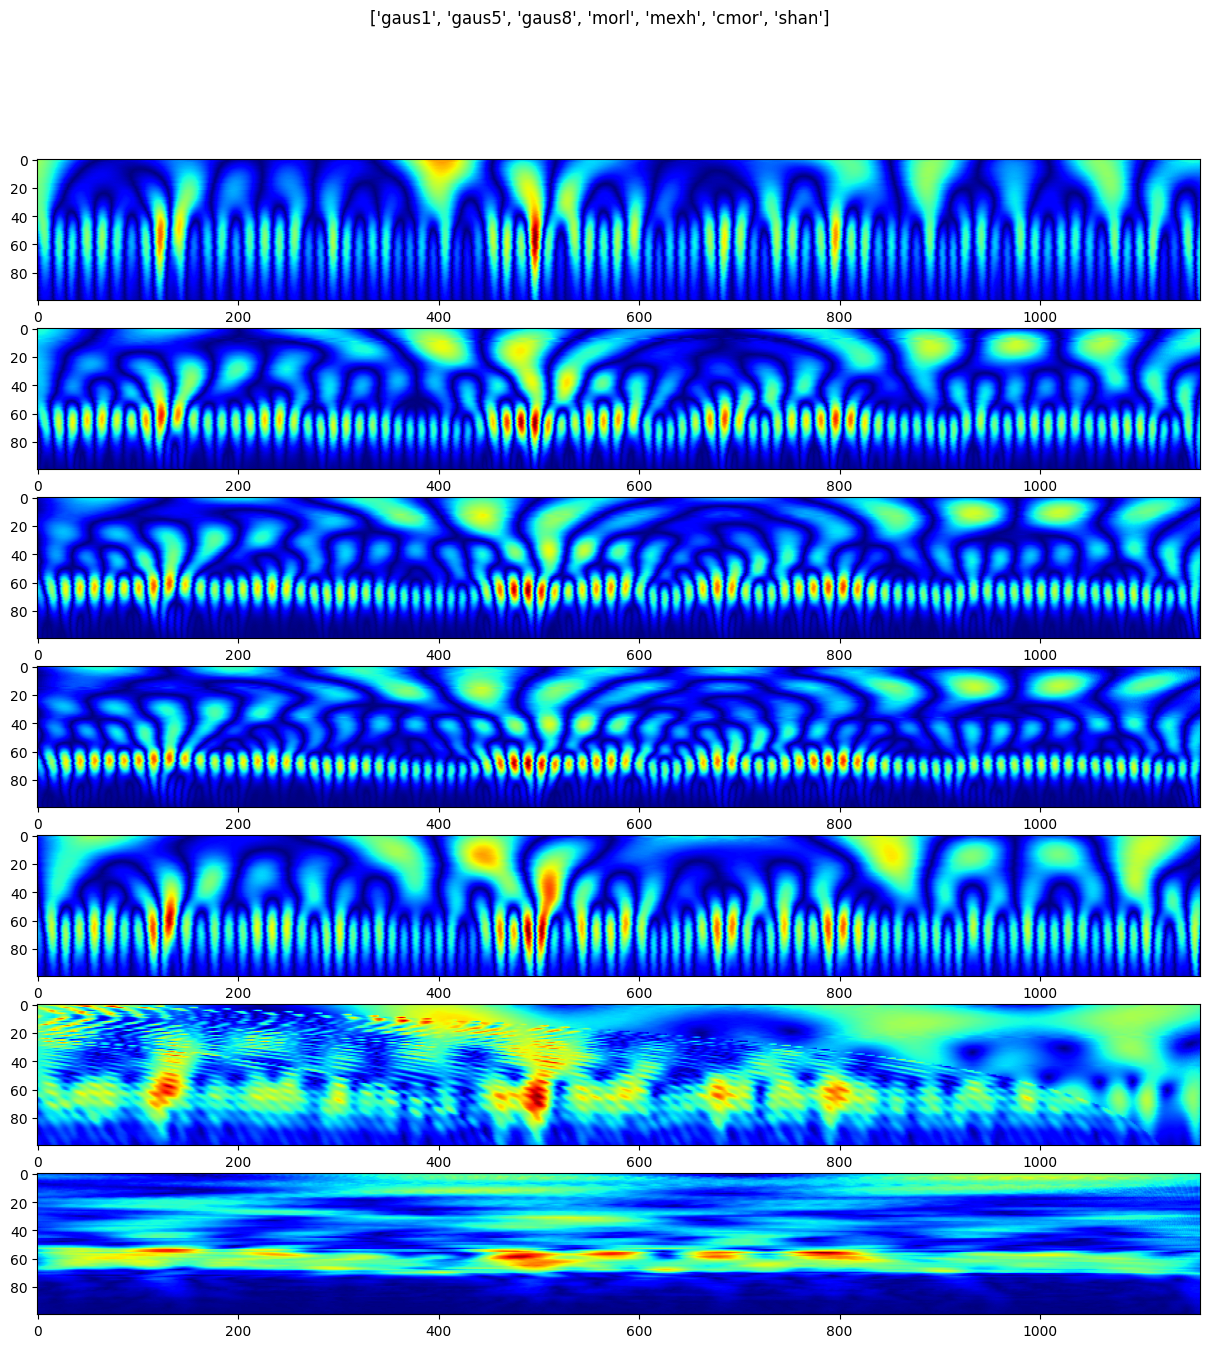

wavelet         HF      SDHF       LF      SDLF      VLF     SDVLF            TP      SDTP       VB
---------  -------  --------  -------  --------  -------  --------  ------------  --------  -------
gaus1      0.16823  11.90939  0.47029  27.50317  0.36148  21.46794  118638.05158  49.86432  2.79543
gaus5      0.17986   6.17397  0.47886  13.65928  0.34128  11.20354   73298.59735  23.37207  2.66238
gaus8      0.19225   4.91593  0.52853  12.17273  0.27922   7.38955   62419.56767  17.87996  2.74927
morl       0.19260   3.59039  0.47443   8.73802  0.33296   6.97711   51987.82443  13.77462  2.46325
mexh       0.16484   9.76741  0.41166  20.19823  0.42350  22.79776  116420.61177  39.99105  2.49729
cmor       0.17394   2.98131  0.43288   6.36010  0.39317   5.25184   57636.22975  11.21997  2.48866
shan       0.21230   1.61914  0.66567   5.25345  0.12203   1.84301   51146.17153   6.79519  3.13545


In [ ]:
get_all_c_wavelets(values,c_wavelets, 0.015, 0.4, 0.25)

HF в норме 15 - 25 %  
LF в норме 35 - 40 %  
VLF в норме 15-30 %  